## Week 1 - Assignment

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

# Import the csv file and seperate at , 
csvFile = "DV01-GroupSurvey.csv"
dataFrame = pd.read_csv(csvFile, sep=',')

In [2]:
dataFrame.head()

,Timestamp,What is your main study profile?,What aspect of Data Visualization is most interesting to you?,How much effort do you intend to invest into this subject?,Your age (in years),Your height (in cm),Your starsign,Your continent,How many cousins do you have?,Do you like spicy food?,Unnamed: 10
0,2017/09/01 12:19:46 PM GMT+2,Software Engineering,(web) programming,10,21,420.69,Leo,Europe,7,No,Option 1
1,2017/09/01 12:22:32 PM GMT+2,Software Engineering,exploring/analysing,8,19,178.00,Cancer,Europe,0,neutral,Option 1
2,2017/09/01 12:23:13 PM GMT+2,Technology,designing and storytelling,7,20,182.00,Scorpio,Europe,12,neutral,Option 1
3,2017/09/01 12:23:20 PM GMT+2,Software Engineering,(web) programming,8,21,197.00,Cancer,Europe,19,neutral,Option 1
4,2017/09/01 12:26:08 PM GMT+2,Mathematics,designing and storytelling,8,23,183.00,Aquarius,Europe,27,Yes,NaN


First thing that I noticed, is the fact that the unnamed column doesn't add something to the set.<br>
I therefore decided to remove it from the dataframe. See the code below:

In [3]:
dataFrame = dataFrame.drop('Unnamed: 10', axis=1)

### Look for missing values

In [4]:
def count_missing(x):
  return sum(x.isnull())
print("Missing values per column:")
print(dataFrame.apply(count_missing, axis=0))

##  There is no missing data

Missing values per column:
Timestamp                                                        0
What is your main study profile?                                 0
What aspect of Data Visualization is most interesting to you?    0
How much effort do you intend to invest into this subject?       0
Your age (in years)                                              0
Your height (in cm)                                              0
Your starsign                                                    0
Your continent                                                   0
How many cousins do you have?                                    0
Do you like spicy food?                                          0
dtype: int64


## 1. Reproducible Research

I noticed that there is something curious with the height column.<br>
Not everyone answered in centimeters, some used a 1.78 notation. There is also one outlier that doesn't fit the rest.

In [5]:
heightFrame = dataFrame['Your height (in cm)']
heightCorrected = []

## function that calculates mean 
def calculateMean(): 
    return np.array(heightFrame).mean()

## check if someone entered a value below 100  
for height in heightFrame:
    if height < 100:
        height = height * 100 ## if so, multiply by 100 to make it in cm
    elif height > 220: ## when the person entered a value greater than 220 
        height = calculateMean()
    
    heightCorrected.append(height)

## add cleaned data to the correct column
dataFrame['Your height (in cm)'] = heightCorrected    

There is also something wrong with the cousins columns. Not everyone entered a numerical value.<br>
I first need to filter out  the string value and replace it with something else.

In [6]:
cousinsFrame = dataFrame['How many cousins do you have?']
cousinsCorrected = []

## check if it is a number, returns true or false
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False

## loop through the dataframe 
for cousin in cousinsFrame:
    cs = pd.Series(is_number(cousin))
    for c in cs:
        if c == "True":
            print(c)


### Some experimenting with charts

First I changed the name of the columns. They are too long to work with, so I changed them to a more
appropriate name.

In [7]:
## Sort the values by age
dataFrame.sort_values(by='Your age (in years)', ascending=False).head()

,Timestamp,What is your main study profile?,What aspect of Data Visualization is most interesting to you?,How much effort do you intend to invest into this subject?,Your age (in years),Your height (in cm),Your starsign,Your continent,How many cousins do you have?,Do you like spicy food?
11,2017/09/01 12:56:51 PM GMT+2,Software Engineering,(web) programming,8,28,160.0,i have no idea,Asia,20,neutral
8,2017/09/01 12:39:52 PM GMT+2,Bussiness,exploring/analysing,10,26,191.0,Aries,Europe,8,Yes
14,2017/09/01 1:15:54 PM GMT+2,Software Engineering,(web) programming,10,26,167.0,Scorpio,South-America,10,neutral
12,2017/09/01 1:12:43 PM GMT+2,Software Engineering,(web) programming,7,25,182.0,Scorpio,Europe,5,neutral
15,2017/09/01 1:44:58 PM GMT+2,Software Engineering,exploring/analysing,7,24,181.0,i have no idea,Europe,1,Yes


ValueError: Invalid RGBA argument: "don't know"

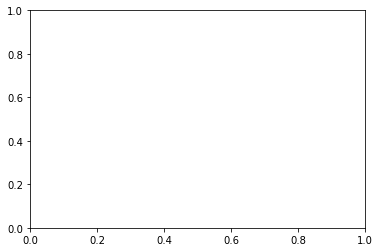

In [8]:
## change name of columns
dataFrame.columns = ['time', 'profile', 'aspect', 'effort', 'age', 'height', 'starsign', 'continent', 'cousins', 'food']

europe_answers = dataFrame[dataFrame['continent'] =='Europe' ]

web = europe_answers[europe_answers['aspect'] == '(web) programming']
profile = europe_answers[europe_answers['profile'] == 'Software Engineering']
age = profile.age

#europe_answers
profile
#plt.hist(np.asarray(europe_answers)

fig = plt.figure()
plt.scatter(dataFrame['age'], dataFrame['height'], c=dataFrame['cousins'])
plt.xlabel('Age')
plt.ylabel('Height [cm]')
plt.colorbar(label='Number of cousins');


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from pandas.tools.plotting import parallel_coordinates
from pandas.tools.plotting import scatter_matrix
%matplotlib inline 

scatter_matrix(dataFrame, alpha=0.5, figsize=(12, 12), diagonal='kde');

In [ ]:
## An age boxplot

europe_answers = dataFrame[dataFrame['continent'] =='Europe' ]

web = europe_answers[europe_answers['aspect'] == '(web) programming']
profile = europe_answers[europe_answers['profile'] == 'Software Engineering']
softwareAge = profile.age

softwareAge.plot.box()

### Question 1: Are older students taller?

In [ ]:
## create different dataframes, one for age and one for height

age = dataFrame['age']
height = dataFrame['height']

## I tried a simple line plot
plt.plot(age, height, label="a")


### Make a histogram for every quantitative attribute. What are these charts saying?

ValueError: color kwarg must have one color per dataset

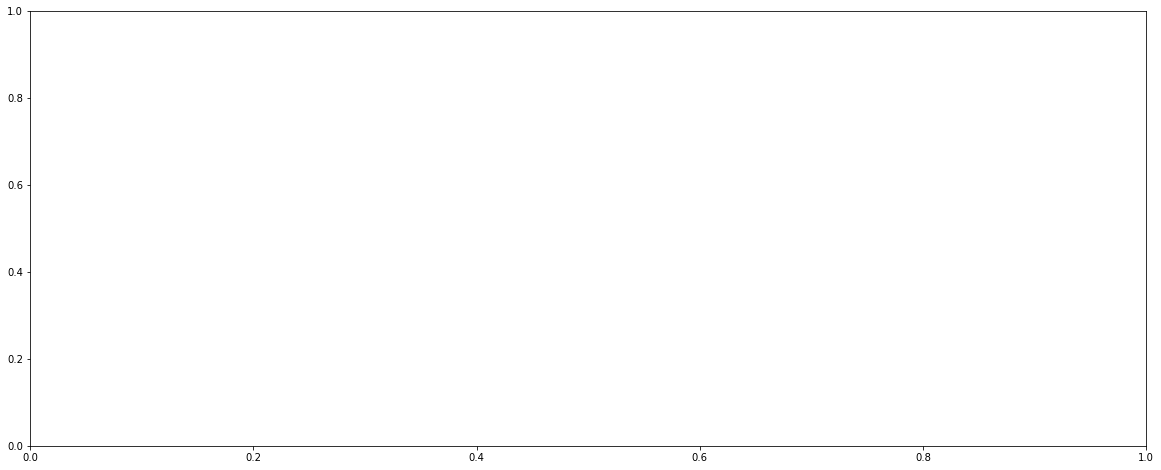

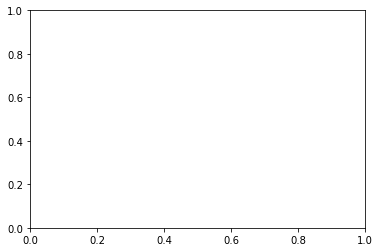

In [13]:
plt.figure(figsize=[20,8])
ax = plt.subplot()

europe_answers = dataFrame[dataFrame['continent'] =='Europe' ]
web = europe_answers[europe_answers['aspect'] == '(web) programming']
profile = europe_answers[europe_answers['profile'] == 'Software Engineering']

# Define a function for a histogram
def histogram(data, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.hist(data, color = 'red')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

# Call the function to create plot
histogram(data = dataFrame['cousins']
           , x_label = 'Cousins'
           , y_label = 'Frequency'
           , title = 'Distribution of Cousins')
